In [1]:
import pandas as pd

df = pd.read_csv("CCR_final.csv")
df

,Timestamp,Elapsed time (minutes),Setpoint (K),Sensor A (K),Sensor B (K),Heater Output % (0-100),Heater Range (integer 0-5),Slope,Intercept,Sensor C (K) or sensor A (sensor unit),Sensor D (K) or sensor B (sensor unit),CCR_ID
0,03/20/2014 03:02:25 PM,0.984532,0.0,282.0220,282.108,0.0,5,1.0,1.0,0.60091,0.60072,./CCR-05/2014/20140320.txt
1,03/20/2014 03:02:30 PM,1.068290,0.0,282.0240,282.110,0.0,5,1.0,1.0,0.60091,0.60071,./CCR-05/2014/20140320.txt
2,03/20/2014 03:02:35 PM,1.151215,0.0,282.0260,282.112,0.0,5,1.0,1.0,0.60090,0.60071,./CCR-05/2014/20140320.txt
3,03/20/2014 03:02:40 PM,1.234957,0.0,282.0280,282.115,0.0,5,1.0,1.0,0.60090,0.60070,./CCR-05/2014/20140320.txt
4,03/20/2014 03:02:45 PM,1.317882,0.0,282.0300,282.117,0.0,5,1.0,1.0,0.60089,0.60070,./CCR-05/2014/20140320.txt
...,...,...,...,...,...,...,...,...,...,...,...,...
621409,04/06/2022 01:18:07 PM,2779.724767,0.0,2.6598,1.000,0.0,5,-0.0,-0.0,2.55128,1.61960,./CCR-19/20190410.txt
621410,04/06/2022 01:18:10 PM,2779.774704,0.0,2.6896,1.000,0.0,5,-0.0,-0.0,2.55128,1.62027,./CCR-19/20190410.txt
621411,04/06/2022 01:18:13 PM,2779.824830,0.0,2.6466,1.000,0.0,5,-0.0,-0.0,2.55128,1.62009,./CCR-19/20190410.txt
621412,04/06/2022 01:18:16 PM,2779.874815,0.0,2.6845,1.000,0.0,5,-0.0,-0.0,2.55128,1.61954,./CCR-19/20190410.txt


# transferred learning, data augmentation, simulation

In [9]:
df_filtered = df[df['CCR_ID'] == './CCR-05/2014/20140320.txt']
df_filtered
df = df_filtered

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV file using pandas
# df = pd.read_csv("CCR_final.csv", delimiter='\t')
 # = temp
temp = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %I:%M:%S %p')

# Extract data columns
timestamps = df['Timestamp']
elapsed_time = df['Elapsed time (minutes)']
setpoint = df['Setpoint (K)']
sensor_a = df['Sensor A (K)']
sensor_b = df['Sensor B (K)']
heater_output = df['Heater Output % (0-100)']
heater_range = df['Heater Range (integer 0-5)']
slope = df['Slope']
intercept = df['Intercept']
sensor_c = df['Sensor C (K) or sensor A (sensor unit)']
sensor_d = df['Sensor D (K) or sensor B (sensor unit)']

# Plot the data
fig, ax = plt.subplots()
ax.plot(timestamps, elapsed_time, label='Elapsed time (minutes)')
ax.plot(timestamps, setpoint, label='Setpoint (K)')
ax.plot(timestamps, sensor_a, label='Sensor A (K)')
ax.plot(timestamps, sensor_b, label='Sensor B (K)')
ax.plot(timestamps, heater_output, label='Heater Output % (0-100)')
ax.plot(timestamps, heater_range, label='Heater Range (integer 0-5)')
ax.plot(timestamps, slope, label='Slope')
ax.plot(timestamps, intercept, label='Intercept')
ax.plot(timestamps, sensor_c, label='Sensor C (K) or sensor A (sensor unit)')
ax.plot(timestamps, sensor_d, label='Sensor D (K) or sensor B (sensor unit)')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.title('Data Plot')

# # Save the graph as a CSV file
# existing_file_path = 'CCR_temp.csv'
# df.to_csv(existing_file_path, mode='a', index=False)

# Display the graph
plt.show()



KeyboardInterrupt



In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

from darts import TimeSeries
from darts.models import GaussianProcessFilter
from darts.utils import timeseries_generation as tg

2023-07-07 10:09:55 darts.models WARNING: The statsforecast module could not be imported. To enable support for the StatsForecastAutoARIMA, StatsForecastAutoETS and Croston models, please consider installing it.


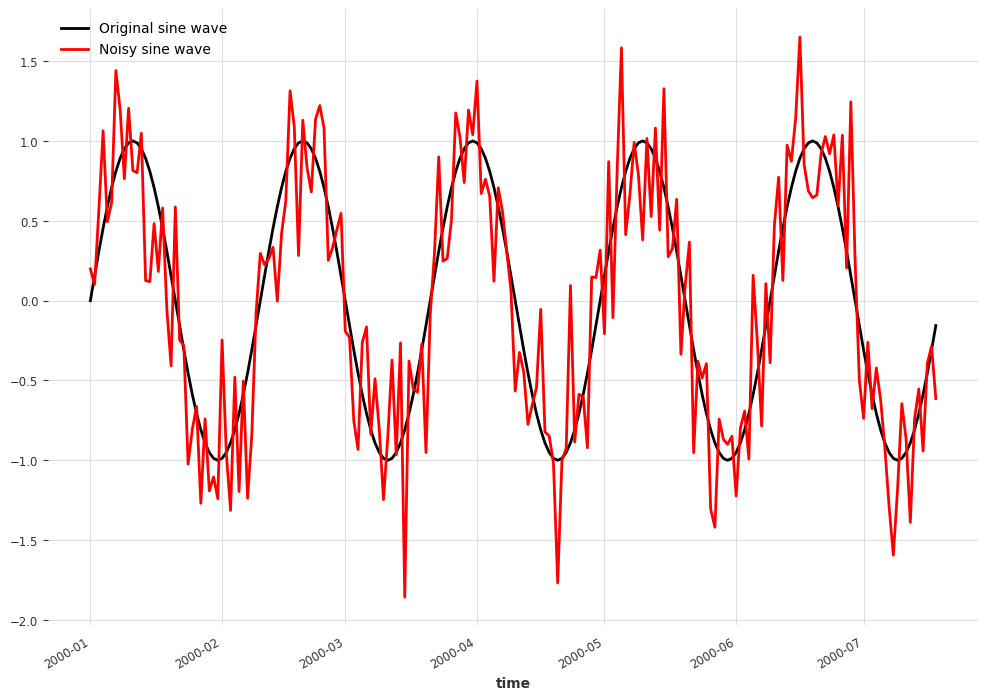

In [6]:
NOISE_DISTANCE = 0.4
SAMPLE_SIZE = 200
np.random.seed(42)

# Prepare the sine wave
x = tg.sine_timeseries(length=SAMPLE_SIZE, value_frequency=0.025)

# Add white noise
noise = tg.gaussian_timeseries(length=SAMPLE_SIZE, std=NOISE_DISTANCE)
x_noise = x + noise

plt.figure(figsize=[12, 8])
x.plot(label="Original sine wave")
x_noise.plot(color="red", label="Noisy sine wave")
plt.legend()
plt.show()

# **Actual Data Test**

In [17]:
df_filtered = df[df['CCR_ID'] == './CCR-05/2014/20140320.txt']
df_filtered
df = df_filtered

In [18]:
df = df.drop(['CCR_ID'], axis=1)
df
# df.to_csv('CCR_edited.csv')

,Timestamp,Elapsed time (minutes),Setpoint (K),Sensor A (K),Sensor B (K),Heater Output % (0-100),Heater Range (integer 0-5),Slope,Intercept,Sensor C (K) or sensor A (sensor unit),Sensor D (K) or sensor B (sensor unit)
0,03/20/2014 03:02:25 PM,0.984532,0.0,282.022,282.108,0.0,5,1.0,1.0,0.60091,0.60072
1,03/20/2014 03:02:30 PM,1.068290,0.0,282.024,282.110,0.0,5,1.0,1.0,0.60091,0.60071
2,03/20/2014 03:02:35 PM,1.151215,0.0,282.026,282.112,0.0,5,1.0,1.0,0.60090,0.60071
3,03/20/2014 03:02:40 PM,1.234957,0.0,282.028,282.115,0.0,5,1.0,1.0,0.60090,0.60070
4,03/20/2014 03:02:45 PM,1.317882,0.0,282.030,282.117,0.0,5,1.0,1.0,0.60089,0.60070
...,...,...,...,...,...,...,...,...,...,...,...
14467,03/21/2014 11:16:36 AM,1215.174710,0.0,277.147,277.174,0.0,4,1.0,1.0,0.61205,0.61199
14468,03/21/2014 11:16:41 AM,1215.258435,0.0,277.109,277.136,0.0,4,1.0,1.0,0.61214,0.61207
14469,03/21/2014 11:16:46 AM,1215.341360,0.0,277.071,277.098,0.0,4,1.0,1.0,0.61222,0.61216
14470,03/21/2014 11:16:51 AM,1215.425118,0.0,277.031,277.059,0.0,4,1.0,1.0,0.61231,0.61225


In [19]:
df = df.drop(['Timestamp'], axis=1)
df
# df.to_csv('CCR_edited.csv')

,Elapsed time (minutes),Setpoint (K),Sensor A (K),Sensor B (K),Heater Output % (0-100),Heater Range (integer 0-5),Slope,Intercept,Sensor C (K) or sensor A (sensor unit),Sensor D (K) or sensor B (sensor unit)
0,0.984532,0.0,282.022,282.108,0.0,5,1.0,1.0,0.60091,0.60072
1,1.068290,0.0,282.024,282.110,0.0,5,1.0,1.0,0.60091,0.60071
2,1.151215,0.0,282.026,282.112,0.0,5,1.0,1.0,0.60090,0.60071
3,1.234957,0.0,282.028,282.115,0.0,5,1.0,1.0,0.60090,0.60070
4,1.317882,0.0,282.030,282.117,0.0,5,1.0,1.0,0.60089,0.60070
...,...,...,...,...,...,...,...,...,...,...
14467,1215.174710,0.0,277.147,277.174,0.0,4,1.0,1.0,0.61205,0.61199
14468,1215.258435,0.0,277.109,277.136,0.0,4,1.0,1.0,0.61214,0.61207
14469,1215.341360,0.0,277.071,277.098,0.0,4,1.0,1.0,0.61222,0.61216
14470,1215.425118,0.0,277.031,277.059,0.0,4,1.0,1.0,0.61231,0.61225


In [21]:
time_series = TimeSeries.from_dataframe(df)

In [22]:
print(time_series)

<TimeSeries (DataArray) (time: 14472, component: 10, sample: 1)>
array([[[9.84532000e-01],
        [0.00000000e+00],
        [2.82022000e+02],
        ...,
        [1.00000000e+00],
        [6.00910000e-01],
        [6.00720000e-01]],

       [[1.06829000e+00],
        [0.00000000e+00],
        [2.82024000e+02],
        ...,
        [1.00000000e+00],
        [6.00910000e-01],
        [6.00710000e-01]],

       [[1.15121500e+00],
        [0.00000000e+00],
        [2.82026000e+02],
        ...,
...
        ...,
        [1.00000000e+00],
        [6.12220000e-01],
        [6.12160000e-01]],

       [[1.21542512e+03],
        [0.00000000e+00],
        [2.77031000e+02],
        ...,
        [1.00000000e+00],
        [6.12310000e-01],
        [6.12250000e-01]],

       [[1.21550803e+03],
        [0.00000000e+00],
        [2.76993000e+02],
        ...,
        [1.00000000e+00],
        [6.12400000e-01],
        [6.12340000e-01]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 ... 14466 

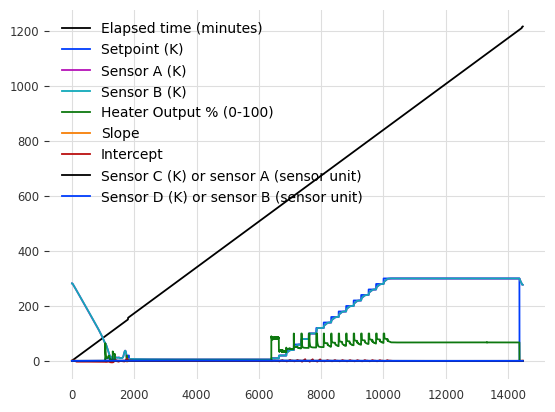

In [15]:
plt.plot(time_series['Elapsed time (minutes)'].pd_series(), label="Elapsed time (minutes)")
plt.plot(time_series['Setpoint (K)'].pd_series(), label="Setpoint (K)")
plt.plot(time_series['Sensor A (K)'].pd_series(), label="Sensor A (K)")
plt.plot(time_series['Sensor B (K)'].pd_series(), label="Sensor B (K)")
plt.plot(time_series['Heater Output % (0-100)'].pd_series(), label="Heater Output % (0-100)")
plt.plot(time_series['Slope'].pd_series(), label="Slope")
plt.plot(time_series['Intercept'].pd_series(), label="Intercept")
plt.plot(time_series['Sensor C (K) or sensor A (sensor unit)'].pd_series(), label="Sensor C (K) or sensor A (sensor unit)")
plt.plot(time_series['Sensor D (K) or sensor B (sensor unit)'].pd_series(), label="Sensor D (K) or sensor B (sensor unit)")

# plt.plot(pred.pd_series(), label= "forecast")
plt.legend()
plt.show()

# Baseline Model

In [3]:
import pandas as pd
from darts import TimeSeries

In [2]:
import pandas as pd
from darts import TimeSeries

# Assuming 'your_dataset.csv' is a string containing the dataset

# df = pd.read_csv(pd.compat.StringIO('your_dataset.csv'))

# Convert the 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

time_series_list = []
for ccr_id, group in df.groupby('CCR_ID'):
    # Sort the group by 'Timestamp' if not already sorted
    group.sort_values('Timestamp', inplace=True)
    
    # Set the 'Timestamp' column as the index
    group.set_index('Timestamp', inplace=True)
    
    # Exclude the 'CCR_ID' column from numeric conversion and resampling
    value_cols = ['Elapsed time (minutes)','Setpoint (K)','Sensor A (K)','Sensor B (K)', 'Heater Output % (0-100)', 'Heater Range (integer 0-5)', 'Slope','Intercept','Sensor C (K) or sensor A (sensor unit)','Sensor D (K) or sensor B (sensor unit)']
    
    # Convert the numeric columns to numeric format, handling non-numeric values as NaN
    for col in value_cols:
        group[col] = pd.to_numeric(group[col], errors='coerce')
    
    # Select only numeric columns for resampling
    numeric_cols = group.select_dtypes(include='number').columns
    
    # Resample the numeric columns to a fixed frequency
    group_resampled = group[numeric_cols].resample('1T').mean()  # Adjust '5S' to the desired frequency
    
    # Handle missing values if necessary
    group_resampled = group_resampled.fillna(method='ffill')  # Forward fill missing values, or choose another appropriate method
    
    # Convert the resampled DataFrame to a Darts TimeSeries object
    time_series = TimeSeries.from_dataframe(group_resampled, value_cols=value_cols)
    
    time_series_list.append(time_series)


/tmp/ipykernel_320418/4206212328.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [3]:
print(time_series_list[0])

<TimeSeries (DataArray) (Timestamp: 1215, component: 10, sample: 1)>
array([[[1.23472100e+00],
        [0.00000000e+00],
        [2.82028286e+02],
        ...,
        [1.00000000e+00],
        [6.00898571e-01],
        [6.00702857e-01]],

       [[2.02642475e+00],
        [0.00000000e+00],
        [2.82007750e+02],
        ...,
        [1.00000000e+00],
        [6.00943333e-01],
        [6.00749167e-01]],

       [[3.02643858e+00],
        [0.00000000e+00],
        [2.80652250e+02],
        ...,
...
        ...,
        [1.00000000e+00],
        [6.10037778e-01],
        [6.09982222e-01]],

       [[1.21404947e+03],
        [0.00000000e+00],
        [2.77655667e+02],
        ...,
        [1.00000000e+00],
        [6.10894167e-01],
        [6.10835000e-01]],

       [[1.21505109e+03],
        [0.00000000e+00],
        [2.77203917e+02],
        ...,
        [1.00000000e+00],
        [6.11919167e-01],
        [6.11858333e-01]]])
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 2014

In [4]:
print(len(time_series_list))

10


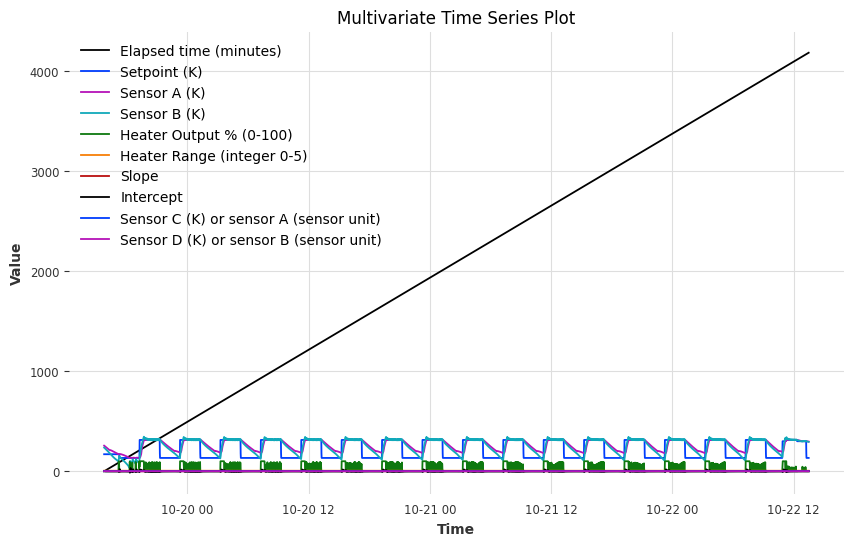

In [5]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
df = (time_series_list[1]).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Time Series Plot')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# fix python path if working locally
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
)
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

2023-07-24 10:29:30 darts.models WARNING: The statsforecast module could not be imported. To enable support for the StatsForecastAutoARIMA, StatsForecastAutoETS and Croston models, please consider installing it.


In [7]:
time_series_list_scaled = []

for time_series in time_series_list:
    scaler = Scaler()
    time_series_list_scaled.append(scaler.fit_transform(time_series))

In [8]:
print((time_series_list[0]).columns)

Index(['Elapsed time (minutes)', 'Setpoint (K)', 'Sensor A (K)',
       'Sensor B (K)', 'Heater Output % (0-100)', 'Heater Range (integer 0-5)',
       'Slope', 'Intercept', 'Sensor C (K) or sensor A (sensor unit)',
       'Sensor D (K) or sensor B (sensor unit)'],
      dtype='object', name='component')


In [9]:
from darts import TimeSeries

covariates = []
for i in range(len(time_series_list)):
    ts_df = (time_series_list[i]).pd_dataframe()
    columns_to_keep = ['Elapsed time (minutes)' , 'Slope', 'Intercept',]
    covariate_ts_df = ts_df[columns_to_keep]
    covariates.append(TimeSeries.from_dataframe(covariate_ts_df))


In [10]:
from darts import TimeSeries

# ts_df = ts.pd_dataframe()
time_final = []
for i in range(len(time_series_list)):
    ts_df = (time_series_list[i]).pd_dataframe()
    columns_to_keep = ['Setpoint (K)', 'Sensor A (K)', 'Sensor B (K)', 'Heater Output % (0-100)', 'Heater Range (integer 0-5)', 'Sensor C (K) or sensor A (sensor unit)', 'Sensor D (K) or sensor B (sensor unit)']
    covariate_ts_df = ts_df[columns_to_keep]
    time_final.append(TimeSeries.from_dataframe(covariate_ts_df))
    
print(len(time_final[0].columns))

7


In [11]:
model = TransformerModel(
    input_chunk_length=120,
    output_chunk_length=30,
    # batch_size=16,
    # n_epochs=50,
    model_name="second",
    # nr_epochs_val_period=10,
    # d_model=16,
    # nhead=8,
    # num_encoder_layers=2,
    # num_decoder_layers=2,
    # dim_feedforward=128,
    # dropout=0.1,
    activation="relu",
    # random_state=42,
    save_checkpoints=True,
    force_reset=True,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)

train, test = [], []

for time_series in time_series_list_scaled:
    train_length = int(len(time_series) * 0.8)
    train.append(time_series[:train_length])
    test.append(time_series[train_length:])

# forecast = model.predict(len(val_series))

In [12]:
model.fit([i for i in train])

MisconfigurationException: No supported gpu backend found!

In [16]:
model.save('trained_model.pth')

In [2]:
loaded_model = TCNModel.load('trained_model.pth')

In [83]:
len(test[1])

56

In [96]:
n_forecast = len(test[3])  # Replace `test` with your test set
pred_series = loaded_model.predict(n=n_forecast, series=train[3])  # Adjust the `n` parameter as needed

Predicting: 0it [00:00, ?it/s]

In [97]:
from darts.metrics import mape, rmse

mape_score = mape(pred_series, test[3])  # Replace `test` with your true future values
rmse_score = rmse(pred_series, test[3])  # Replace `test` with your true future values

print(f"MAPE: {mape_score:.2f}%")
print(f"RMSE: {rmse_score:.2f}")

MAPE: 67.61%
RMSE: 0.02


In [79]:
print(test_series.dtype)
print(pred_series.dtype)

float64
float64


In [ ]:
# information bottlenecks